## Step 1: Data Preparation and Predictions

This code adjusts 2025 election predictions based on the differences between 2021 predictions and actual results. It computes average adjusted predictions for each party and prepares data for a Monte Carlo simulation by calculating the mean and standard deviation. 

In [43]:
from re import X
import matplotlib.pyplot as plt
import numpy as np

institute_2021 = {'allensbach': {'CDU': 25, 'SPD': 26, 'AfD': 10, 'Grüne': 16, 'FDP': 10.5, 'Linke': 5},
             'dimap': {'CDU': 22, 'SPD': 26, 'AfD': 11, 'Grüne': 15, 'FDP': 11, 'Linke': 6},
             #'civey': {'CDU': 23, 'SPD': 25, 'AfD': 10, 'Grüne': 16, 'FDP': 12, 'Linke': 6},
             'fg wahlen': {'CDU': 23, 'SPD': 25, 'AfD': 10, 'Grüne': 16.5, 'FDP': 11, 'Linke': 6},
             'wk': {'CDU': 22.5, 'SPD': 25.5, 'AfD': 11, 'Grüne': 14, 'FDP': 12, 'Linke': 7},
             'insa': {'CDU': 22, 'SPD': 25, 'AfD': 11, 'Grüne': 15, 'FDP': 12, 'Linke': 6.5},
             'gms': {'CDU': 23, 'SPD': 25, 'AfD': 11, 'Grüne': 16, 'FDP': 13, 'Linke': 6},
             'forsa': {'CDU': 22, 'SPD': 25, 'AfD': 10, 'Grüne': 17, 'FDP': 12, 'Linke': 6},
             'ipsos': {'CDU': 22, 'SPD': 26, 'AfD': 11, 'Grüne': 16, 'FDP': 12, 'Linke': 7},
             'yougov': {'CDU': 21, 'SPD': 25, 'AfD': 12, 'Grüne': 14, 'FDP': 11, 'Linke': 7},
             'emnid': {'CDU': 21, 'SPD': 25, 'AfD': 11, 'Grüne': 16, 'FDP': 11, 'Linke': 7} }

institute_2025 = {
    'allensbach': {'CDU': 32, 'SPD': 15, 'AfD': 20, 'Grüne': 13, 'FDP': 5, 'Linke': 6},
    'dimap': {'CDU': 32, 'SPD': 14, 'AfD': 21, 'Grüne': 14, 'FDP': 4, 'Linke': 6},
    'fg wahlen': {'CDU': 30, 'SPD': 16, 'AfD': 20, 'Grüne': 14, 'FDP': 4, 'Linke': 7},
    'wk': {'CDU': 30, 'SPD': 14.5, 'AfD': 20, 'Grüne': 12, 'FDP': 4, 'Linke': 7},
    'insa': {'CDU': 30, 'SPD': 15, 'AfD': 21, 'Grüne': 13, 'FDP': 4, 'Linke': 6},
    'gms': {'CDU': 31, 'SPD': 15, 'AfD': 20, 'Grüne': 13, 'FDP': 4, 'Linke': 6},
    'forsa': {'CDU': 30, 'SPD': 16, 'AfD': 20, 'Grüne': 13, 'FDP': 5, 'Linke': 7},
    'ipsos': {'CDU': 29, 'SPD': 16, 'AfD': 21, 'Grüne': 13, 'FDP': 4, 'Linke': 4},
    'yougov': {'CDU': 27, 'SPD': 17, 'AfD': 20, 'Grüne': 12, 'FDP': 4, 'Linke': 9},
    'emnid': {'CDU': 30, 'SPD': 15, 'AfD': 20, 'Grüne': 14, 'FDP': 4, 'Linke': 4}
}

ergebnis = {'CDU': 24.2, 'SPD': 25.7, 'AfD': 10.4, 'Grüne': 14.7, 'FDP': 11.4, 'Linke': 4.9}
differenz = {'CDU': None, 'SPD': None, 'AfD': None, 'Grüne': None, 'FDP': None, 'Linke': None}

# Initialize dictionaries to store sums and counts
party_sums = {party: 0 for party in ergebnis}  
party_counts = {party: 0 for party in ergebnis}

adjusted_2025 = {}

for institute_name, predictions_2021 in institute_2021.items():
    if institute_name in institute_2025:  # Only adjust if 2025 data exists
        adjusted_2025[institute_name] = {}
        print(f"\nAdjusted Predictions for {institute_name}:")

        for party, predicted_2021 in predictions_2021.items():
            if party in ergebnis and party in institute_2025[institute_name]:
                # Compute difference from 2021
                difference_2021 = predicted_2021 - ergebnis[party]

                # Adjust 2025 prediction
                adjusted_prediction = institute_2025[institute_name][party] - difference_2021

                # Store adjusted value
                adjusted_2025[institute_name][party] = round(adjusted_prediction, 1)

                # Sum up for average calculation
                party_sums[party] += adjusted_2025[institute_name][party]
                party_counts[party] += 1

                print(f"{party}: {adjusted_2025[institute_name][party]}")

# Global variable to store average predictions
average_predictions = {}

# Compute average for each party and store in global variable
print("\n--- Average Adjusted 2025 Predictions ---")
average_predictions = {party: round(party_sums[party] / party_counts[party], 1) for party in ergebnis}
for party, avg in average_predictions.items():
    print(f"{party}: {avg}")

# Prepare data for Monte Carlo Simulation
party_labels = list(ergebnis.keys())
means = []
std_devs = []

# Calculate mean and standard deviation for error bars
for party in party_labels:
    values = [adjusted_2025[institute][party] for institute in adjusted_2025 if party in adjusted_2025[institute]]
    means.append(np.mean(values))
    std_devs.append(np.std(values))

# Print the standard deviations for each party
print("\n--- Standard Deviations ---")
for party, std in zip(party_labels, std_devs):
    print(f"{party}: {std:.2f}")

# Global dictionary to store mean values for each party
party_means_dict = {}

def store_party_means(party_labels, means):
    # Store rounded mean values in the global dictionary
    for party in party_labels:
        party_means_dict[party] = round(means[party_labels.index(party)], 2)

# Call the function to store the means
store_party_means(party_labels, means)



Adjusted Predictions for allensbach:
CDU: 31.2
SPD: 14.7
AfD: 20.4
Grüne: 11.7
FDP: 5.9
Linke: 5.9

Adjusted Predictions for dimap:
CDU: 34.2
SPD: 13.7
AfD: 20.4
Grüne: 13.7
FDP: 4.4
Linke: 4.9

Adjusted Predictions for fg wahlen:
CDU: 31.2
SPD: 16.7
AfD: 20.4
Grüne: 12.2
FDP: 4.4
Linke: 5.9

Adjusted Predictions for wk:
CDU: 31.7
SPD: 14.7
AfD: 19.4
Grüne: 12.7
FDP: 3.4
Linke: 4.9

Adjusted Predictions for insa:
CDU: 32.2
SPD: 15.7
AfD: 20.4
Grüne: 12.7
FDP: 3.4
Linke: 4.4

Adjusted Predictions for gms:
CDU: 32.2
SPD: 15.7
AfD: 19.4
Grüne: 11.7
FDP: 2.4
Linke: 4.9

Adjusted Predictions for forsa:
CDU: 32.2
SPD: 16.7
AfD: 20.4
Grüne: 10.7
FDP: 4.4
Linke: 5.9

Adjusted Predictions for ipsos:
CDU: 31.2
SPD: 15.7
AfD: 20.4
Grüne: 11.7
FDP: 3.4
Linke: 1.9

Adjusted Predictions for yougov:
CDU: 30.2
SPD: 17.7
AfD: 18.4
Grüne: 12.7
FDP: 4.4
Linke: 6.9

Adjusted Predictions for emnid:
CDU: 33.2
SPD: 15.7
AfD: 19.4
Grüne: 12.7
FDP: 4.4
Linke: 1.9

--- Average Adjusted 2025 Predictions ---
CDU

## Step 2: Graphical Representation

Visual depiction of the expected election results, incorporating error bars to represent a 68% confidence interval.

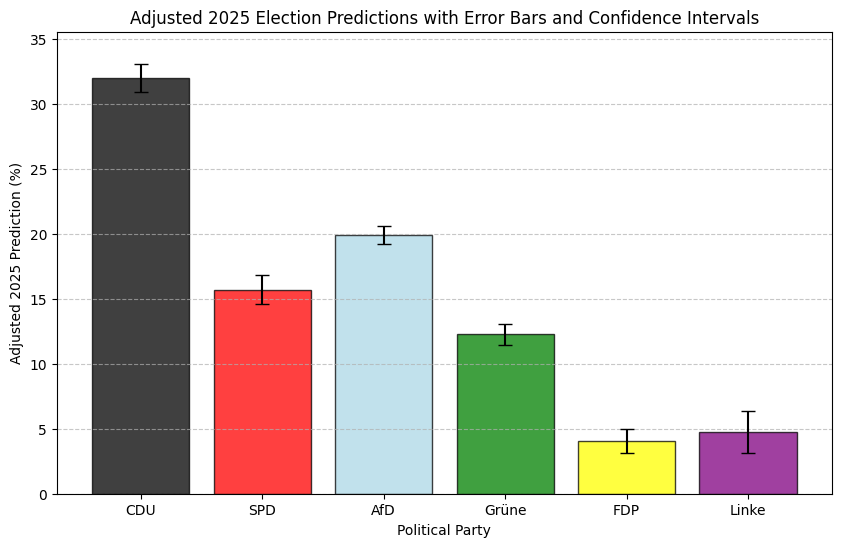

In [45]:
# Define colors for each party
party_colors = {
    'CDU': 'black',
    'SPD': 'red',
    'AfD': 'lightblue',
    'Grüne': 'green',
    'FDP': 'yellow',
    'Linke': 'purple'
}

# Create figure and bar plot
plt.figure(figsize=(10, 6))
plt.bar(party_labels, means, yerr=std_devs, capsize=5, 
        color=[party_colors[party] for party in party_labels], 
        edgecolor='black', alpha=0.75)

# Labels and title
plt.xlabel("Political Party")
plt.ylabel("Adjusted 2025 Prediction (%)")
plt.title("Adjusted 2025 Election Predictions with Error Bars and Confidence Intervals")
plt.ylim(0, max(means) + max(std_devs) + 2)  # Ensure enough space for error bars
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


## Step 3: Monte Carlo Simulation

Modeling election results based on 100,000 randomly sampled results. 

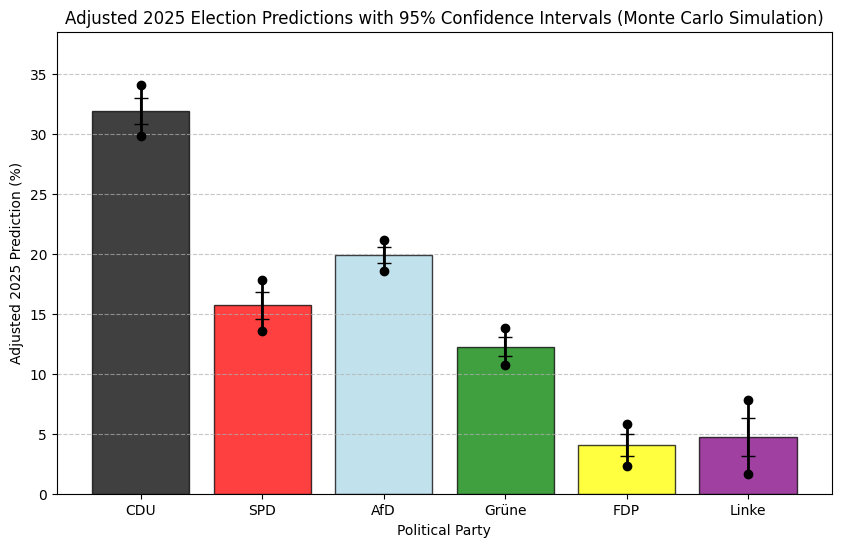


--- 95% Confidence Intervals (Monte Carlo Simulation) ---
CDU: 29.82% to 34.09%
SPD: 13.59% to 17.85%
AfD: 18.57% to 21.20%
Grüne: 10.71% to 13.85%
FDP: 2.33% to 5.80%
Linke: 1.61% to 7.83%


In [50]:
# Monte Carlo simulation parameters
n_simulations = 10000  # Number of simulations

# Simulate the results for each party
simulated_results = {party: np.random.normal(loc=mean, scale=std_dev, size=n_simulations)
                     for party, mean, std_dev in zip(party_labels, means, std_devs)}

# Compute the 2.5th and 97.5th percentiles for the confidence intervals
percentiles_95 = {party: np.percentile(simulated_results[party], [2.5, 97.5]) for party in party_labels}

# Plotting the results with the confidence intervals
plt.figure(figsize=(10, 6))

# Plotting the means with party-specific colors
plt.bar(party_labels, means, yerr=std_devs, capsize=5, 
        color=[party_colors[party] for party in party_labels], 
        edgecolor='black', alpha=0.75)

# Adding the confidence intervals with party-specific colors
for i, party in enumerate(party_labels):
    lower, upper = percentiles_95[party]
    plt.plot([i, i], [lower, upper], color='black', lw=2)  # Confidence interval line
    plt.scatter(i, lower, color='black', zorder=5)  # Lower bound dot
    plt.scatter(i, upper, color='black', zorder=5)  # Upper bound dot

# Labels and title
plt.xlabel("Political Party")
plt.ylabel("Adjusted 2025 Prediction (%)")
plt.title("Adjusted 2025 Election Predictions with 95% Confidence Intervals (Monte Carlo Simulation)")
plt.ylim(0, max(means) + max(std_devs) + 5)  # Ensure enough space for error bars
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

# Display the confidence intervals
print("\n--- 95% Confidence Intervals (Monte Carlo Simulation) ---")
for party in party_labels:
    lower, upper = percentiles_95[party]
    print(f"{party}: {lower:.2f}% to {upper:.2f}%")

### Now visually graph as a histogram

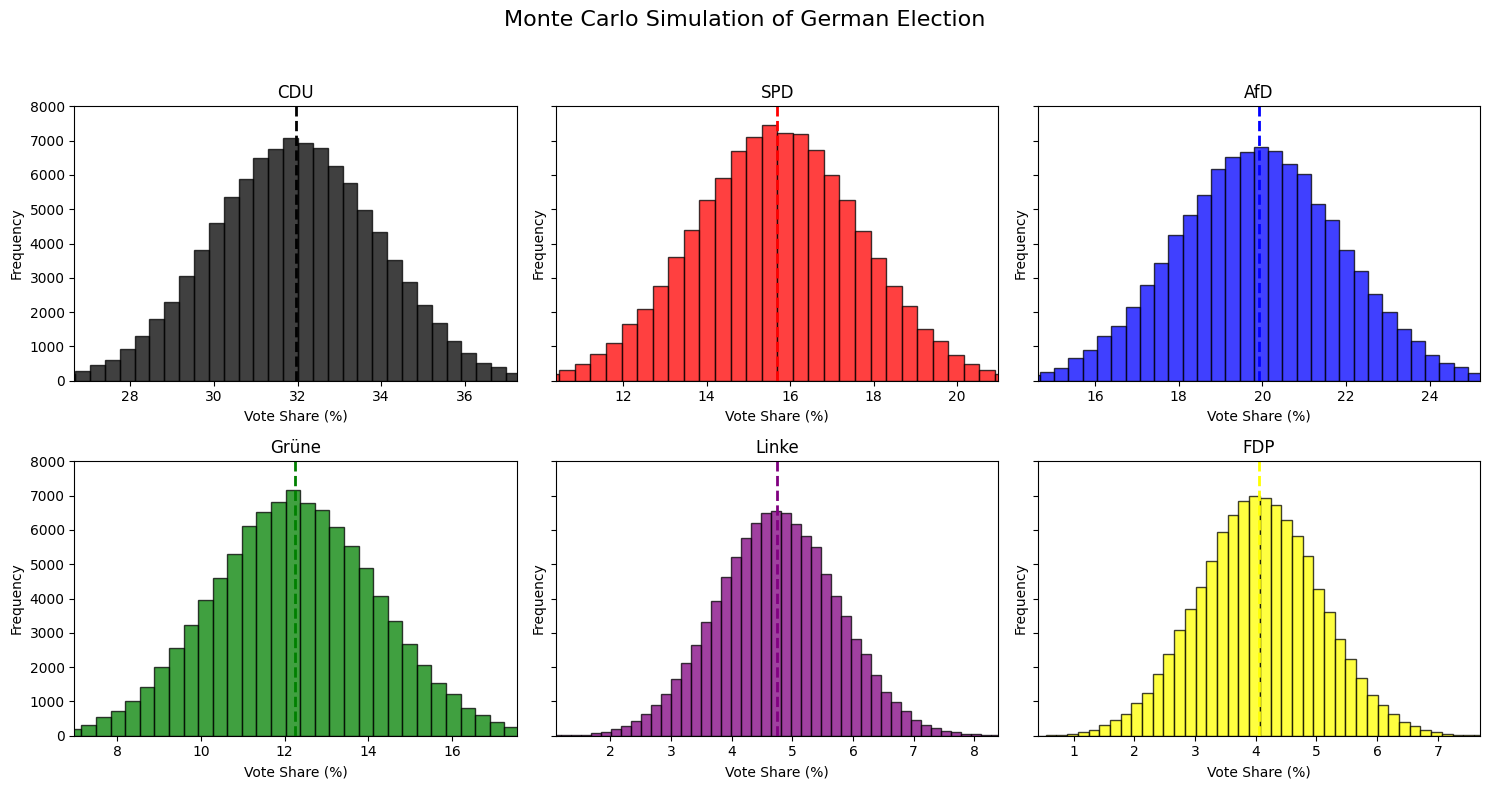


--- 95% Confidence Intervals (Monte Carlo Simulation) ---
CDU: 28.04% to 35.85%
SPD: 11.79% to 19.63%
AfD: 16.00% to 23.82%
Grüne: 8.36% to 16.18%
Linke: 2.79% to 6.71%
FDP: 2.08% to 6.02%


In [51]:
# Monte Carlo simulation parameters
n_simulations = 100000  # Number of simulations

# Party labels and example data (replace with your actual means and standard deviations)
party_labels = ['CDU', 'SPD', 'AfD', 'Grüne', 'Linke', 'FDP']
means = [party_means_dict['CDU'], party_means_dict['SPD'], party_means_dict['AfD'], party_means_dict['Grüne'], party_means_dict['Linke'], party_means_dict['FDP']]  # Example mean vote shares
std_devs = [2, 2, 2, 2, 1, 1]  # Example standard deviations

# Define colors for each party
party_colors = {
    'CDU': 'black',
    'SPD': 'red',
    'AfD': 'blue',
    'Grüne': 'green',
    'Linke': 'purple',
    'FDP': 'yellow'
}

# Simulate the results for each party
simulated_results = {party: np.random.normal(loc=mean, scale=std_dev, size=n_simulations)
                     for party, mean, std_dev in zip(party_labels, means, std_devs)}

# Calculate 95% confidence intervals (2.5th and 97.5th percentiles)
percentiles_95 = {party: np.percentile(results, [2.5, 97.5]) 
                  for party, results in simulated_results.items()}

# Calculate 5th and 95th percentiles for dynamic x-axis scaling
percentiles_5_95 = {party: np.percentile(results, [5, 95]) 
                    for party, results in simulated_results.items()}

# Create a figure with subplots (one for each party, arranged in a 2x3 grid)
fig, axes = plt.subplots(2, 3, figsize=(15, 8), sharey=True)

# Flatten the 2D array of axes for easier iteration
axes = axes.flatten()

# Plotting histograms for each party in separate subplots
for i, party in enumerate(party_labels):
    ax = axes[i]
    ax.hist(simulated_results[party], bins=50, color=party_colors[party], edgecolor='black', 
            alpha=0.75, density=False, orientation='vertical')
    
    # Add vertical line for the mean
    ax.axvline(x=np.mean(simulated_results[party]), color=party_colors[party], linestyle='--', lw=2)
    
    # Set labels and title for each subplot
    ax.set_title(f'{party}', fontsize=12)
    ax.set_xlabel('Vote Share (%)', fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)
    
    # Set dynamic x-limits based on 5th and 95th percentiles
    lower, upper = percentiles_5_95[party]
    # Add a buffer of 2% on each side to ensure the histogram fits well
    ax.set_xlim(lower - 2, upper + 2)
    
    # Set y-limits to match the provided graph
    ax.set_ylim(0, 8000)

# Adjust layout to prevent overlap and add a super title
plt.suptitle('Monte Carlo Simulation of German Election', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plot
plt.show()

# Display the confidence intervals
print("\n--- 95% Confidence Intervals (Monte Carlo Simulation) ---")
for party in party_labels:
    lower, upper = percentiles_95[party]
    print(f"{party}: {lower:.2f}% to {upper:.2f}%")

### Calculating the Probabilities

Calculate the probabilities for certain outcomes.

In [40]:
cdu_results = simulated_results['CDU']
cdu_over_35 = np.sum(cdu_results > 35)  # Count how many times CDU is over 35%
probability_cdu_over_35 = cdu_over_35 / n_simulations  # Calculate the probability
print(f"Probability that CDU will land over 35%: {probability_cdu_over_35 * 100:.2f}%")


Probability that CDU will land over 35%: 6.37%


In [41]:
# Calculate the probability that AfD will land under 20%
afd_results = simulated_results['AfD']
afd_under_20 = np.sum(afd_results < 20)  # Count how many times AfD is under 20%
probability_afd_under_20 = afd_under_20 / n_simulations  # Calculate the probability

print(f"Probability that AfD will land under 20%: {probability_afd_under_20 * 100:.2f}%")


Probability that AfD will land under 20%: 51.99%
